In [1]:
import pandas as pd
import numpy as np
import numpy.random as nr

In [2]:
df = pd.read_table('../phase2/run.1k.txt')

In [3]:
df['crazy'] = df.r_g.abs() > 2

In [8]:
c=['r_b', 'h2', 'pop1', 'pop2']
G=df.groupby(c)

In [6]:
pd.DataFrame( {
    'r_g': G.r_g.mean(),
    'se':  G.r_g.std() / np.sqrt(G.r_g.count()),
    'runs': G.r_g.count(),
    'crazy': G.crazy.sum()})

crazy       r_g  runs        se
r_b h2  pop1 pop2                                 
0.5 0.5 afr  eas       0  0.390903  1000  0.008798
             eur       0  0.427030   954  0.007021
             lat       0  0.444351   990  0.008389
        eas  eur       0  0.437151   980  0.006928
             lat       1  0.320126   997  0.102785
        eur  lat       1  0.505994   980  0.006249
1.0 0.5 afr  eas       1  0.755184   983  0.008832
             eur       2  0.952434   870  0.065399
             lat       4  1.677229   982  0.472951
        eas  eur       0  0.884604   931  0.006851
             lat       0  0.871435   997  0.007336
        eur  lat       0  1.001070   980  0.005012

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Kevin\Miniconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


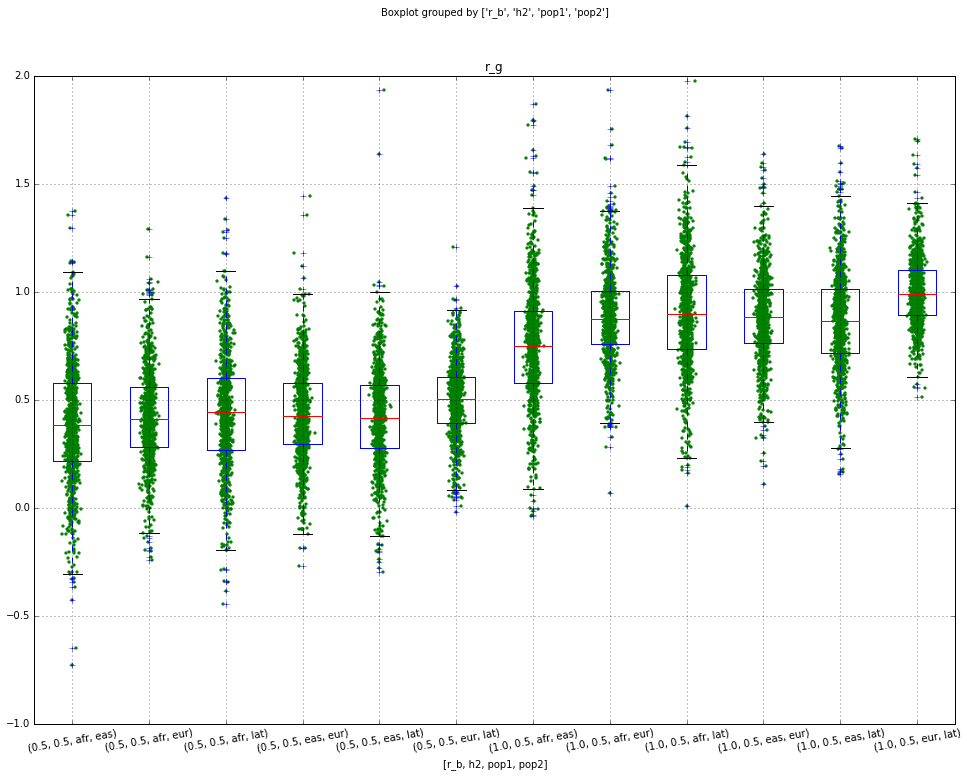

In [9]:
df.boxplot(column='r_g', by=c, figsize=(16,12))

for i, (name, g) in enumerate(G):
    y = g.r_g
    x = nr.normal(i+1, 0.04, len(y))
    plt.scatter(x, y, marker='.', color='green')

locs, labels = plt.xticks()
plt.setp(labels, rotation=10)

plt.ylim(-1,2)

plt.show()

C:\Users\Kevin\Miniconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


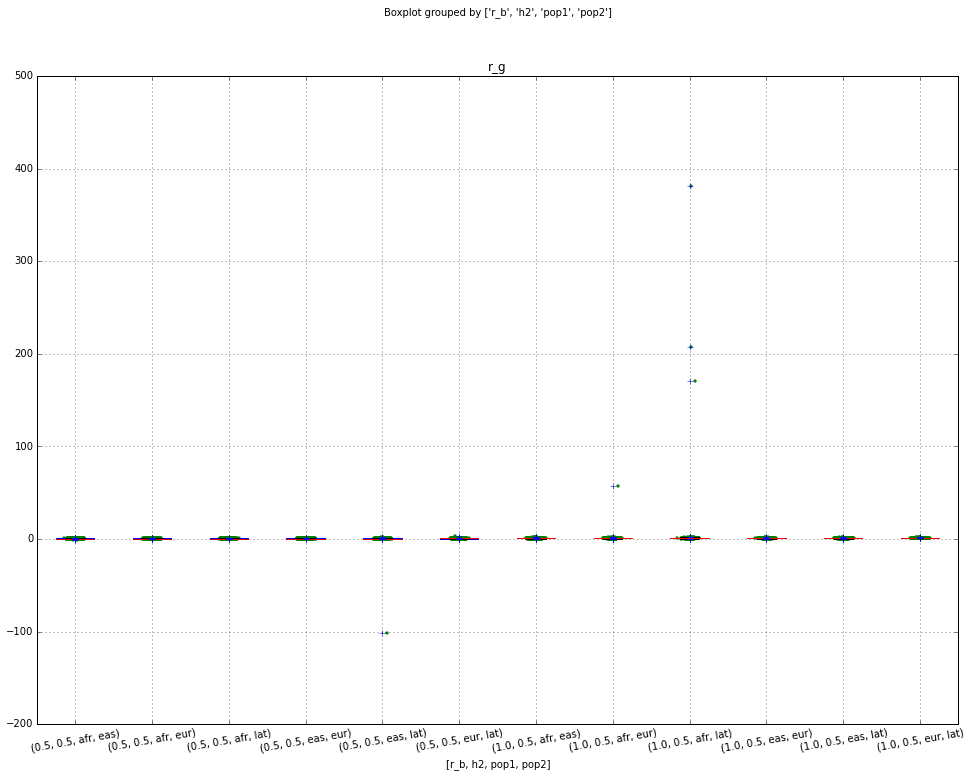

In [10]:
df.boxplot(column='r_g', by=c, figsize=(16,12))

for i, (name, g) in enumerate(G):
    y = g.r_g
    x = nr.normal(i+1, 0.04, len(y))
    plt.scatter(x, y, marker='.', color='green')

locs, labels = plt.xticks()
plt.setp(labels, rotation=10)

plt.show()

In [11]:
import seaborn as sns

In [12]:
df['pops'] = df.pop1 + '-' + df.pop2

C:\Users\Kevin\Miniconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


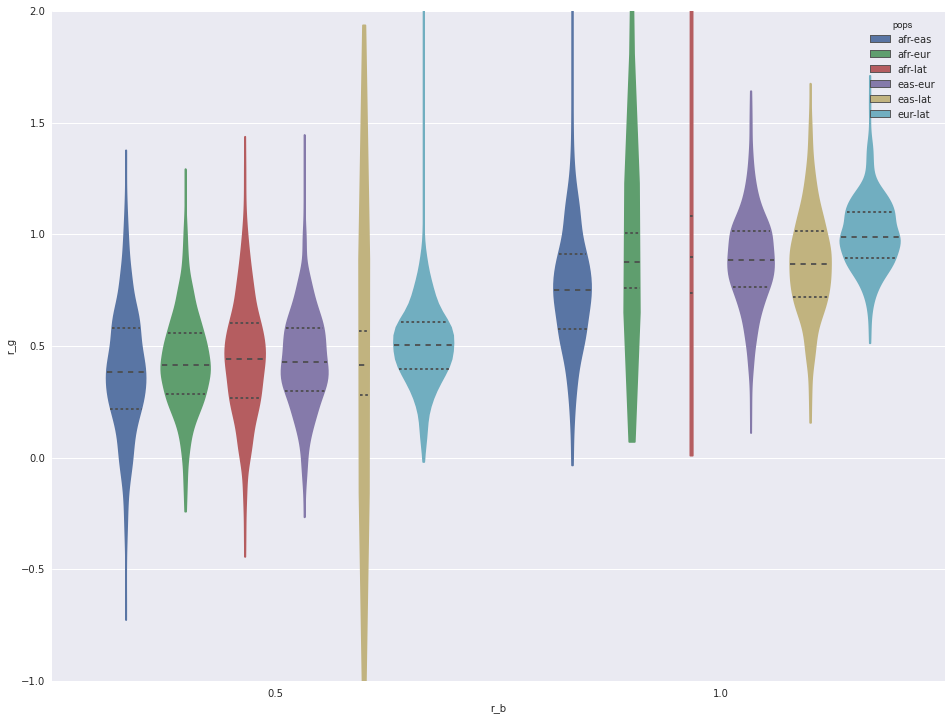

In [13]:
plt.figure(figsize=(16,12))
sns.violinplot(x="r_b", y="r_g", hue='pops', data=df, cut=0, inner='quartiles')
plt.ylim(-1,2)
plt.show()

In [ ]:
dd